In [4]:
#############📘 Milestone 1: Forecasting Air Quality Using Historical Pollution Data##########
!pip install pandas numpy matplotlib seaborn


In [22]:
# ============================
# 1. Import Libraries
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: nicer plots
sns.set(style="whitegrid")


In [23]:
# ============================
# 2. Load Dataset
# ============================
file_path = r"C:\Users\HP\OneDrive\Desktop\.ipynb_checkpoints\delhi_aqi.csv"  # <- Update if moved

# Verify file exists
import os
if os.path.exists(file_path):
    print("File found ✅")
else:
    print("File NOT found ❌ Check the path!")

# Load CSV
df = pd.read_csv(file_path)

# Show first 5 rows
df.head()


File found ✅


,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [24]:
# ============================
# 3. Check Columns & Data Types
# ============================
print(df.columns)       # Check actual column names
print(df.info())        # Info: types, missing values
print(df.describe())    # Summary statistics



Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB
None
                 co            no           no2            o3           so2  \
count  18776.000000  18776.000000  18776.000000  18776.000000  18776.000000   
mean    2929.228628     33.660702     66.221299     60.346239     66.693633   
std     2854.523506     62.127118     48.527492     80.464932     49.439191   
min      260.350000     

In [26]:
# ============================
# 4. Clean Column Names & Convert Date
# ============================

# Strip extra spaces just in case
df.columns = df.columns.str.strip()

# Correct date column name
date_column = 'date'  # lowercase

# Convert to datetime
df[date_column] = pd.to_datetime(df[date_column], errors='coerce')

# Check for conversion issues
print("Missing dates after conversion:", df[date_column].isnull().sum())


Missing dates after conversion: 0


In [28]:
# ============================
# 5. Handle Missing Values
# ============================

# Check missing values
print(df.isnull().sum())

# List of pollutant columns
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Fill missing numeric pollutant values with mean (pandas 3.0 safe)
for col in pollutant_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mean())


# Drop rows where date conversion failed
df.dropna(subset=[date_column], inplace=True)


date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


In [29]:
# ============================
# 6. Remove Duplicates
# ============================
print("Duplicates before:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after:", df.duplicated().sum())


Duplicates before: 0
Duplicates after: 0


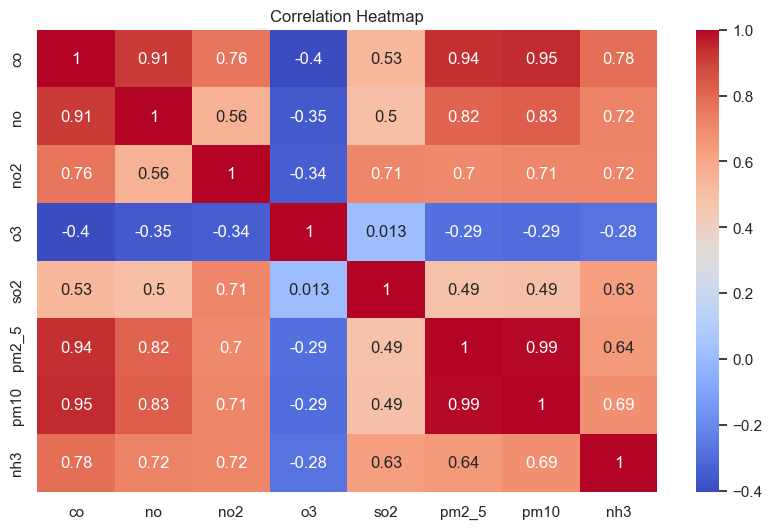

In [30]:
# ============================
# 7. EDA: Correlation Heatmap
# ============================
plt.figure(figsize=(10,6))
sns.heatmap(df[pollutant_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


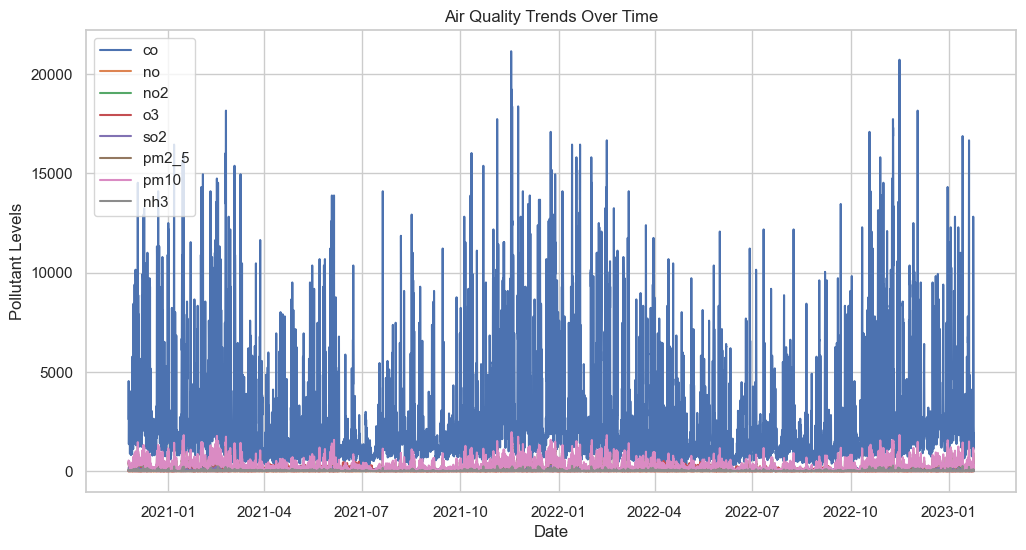

In [31]:
# ============================
# 8. EDA: Pollutant Trends Over Time
# ============================
plt.figure(figsize=(12,6))

for col in pollutant_cols:
    plt.plot(df[date_column], df[col], label=col)

plt.xlabel("Date")
plt.ylabel("Pollutant Levels")
plt.title("Air Quality Trends Over Time")
plt.legend()
plt.show()


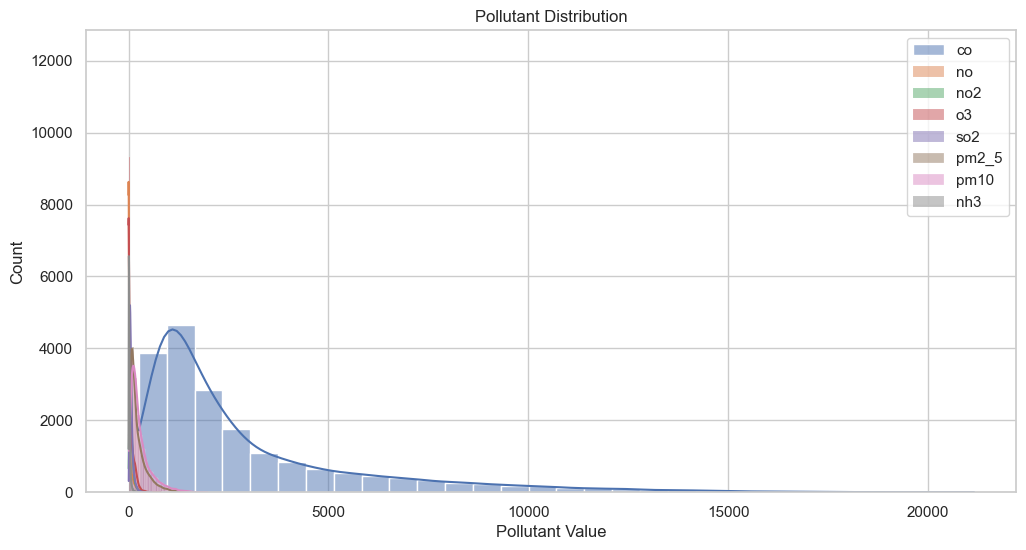

In [32]:
# ============================
# 9. EDA: Distribution of Pollutants
# ============================
plt.figure(figsize=(12,6))
for col in pollutant_cols:
    sns.histplot(df[col], bins=30, kde=True, label=col, alpha=0.5)

plt.title("Pollutant Distribution")
plt.xlabel("Pollutant Value")
plt.legend()
plt.show()
